# 1.Business Case 

In [2]:
#Blood transfusion saves lives - from replacing lost blood during major surgery or a serious injury to treating various illnesses and blood disorders. Ensuring that there's enough blood in supply whenever needed is a serious challenge for the health professionals. According to WebMD,"about 5 million Americans need a blood transfusion every year". Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus in March 2007

# 2.import libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 3.load the data

In [5]:
data=pd.read_csv('Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')
data

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


In [24]:
data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [25]:
data.tail()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [8]:
data.columns

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [10]:
data.isnull().sum()

Unnamed: 0                     0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

In [11]:
data.shape

(576, 6)

In [12]:
data.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [31]:
#Renaming the columns since there are not in the readable manner
data.rename({'Unnamed: 0':"ID", 'Months since Last Donation':"LastDonation_Month", 'Number of Donations':"TotalDonations",
       'Total Volume Donated (c.c.)':"DonatedBlood_Volume",'Months since First Donation':"FirstDonation_Month",
       'Made Donation in March 2007':"Target"},axis=1,inplace=True)

In [13]:
data.columns

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [14]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html() 

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


AttributeError: 'numpy.int64' object has no attribute 'startswith'

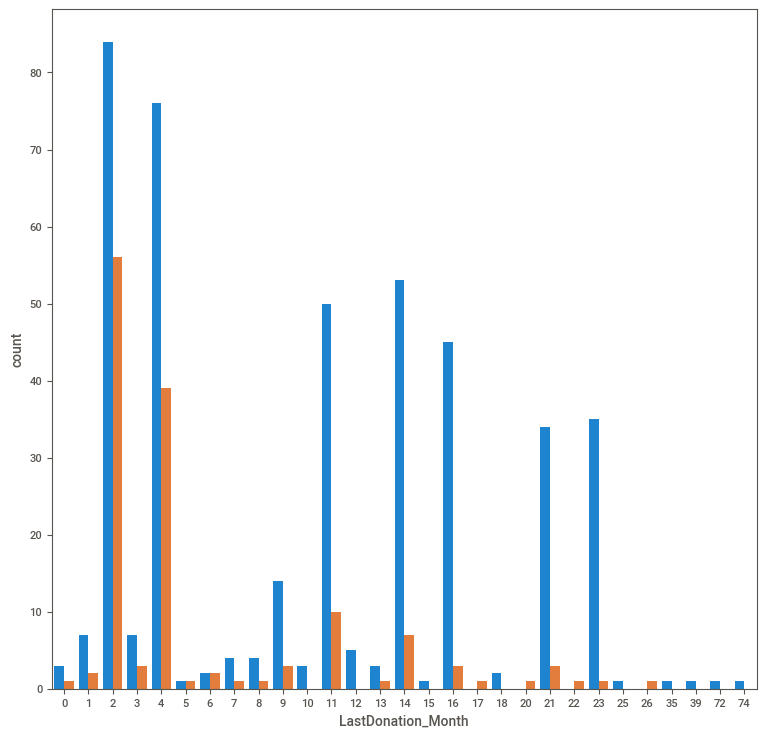

In [32]:
plt.figure(figsize =(20,30),facecolor = 'white')
plotnumber = 1
for i in data:
    if i != 'ID' and i != 'Target':
        ax = plt.subplot(3,2,plotnumber)
        sns.countplot(x=i,hue= 'Target',data=data)
        plt.ylabel(i,fontsize=18)
        plt.xlabel('Target',fontsize=18)
    plotnumber+=1
plt.tight_layout()

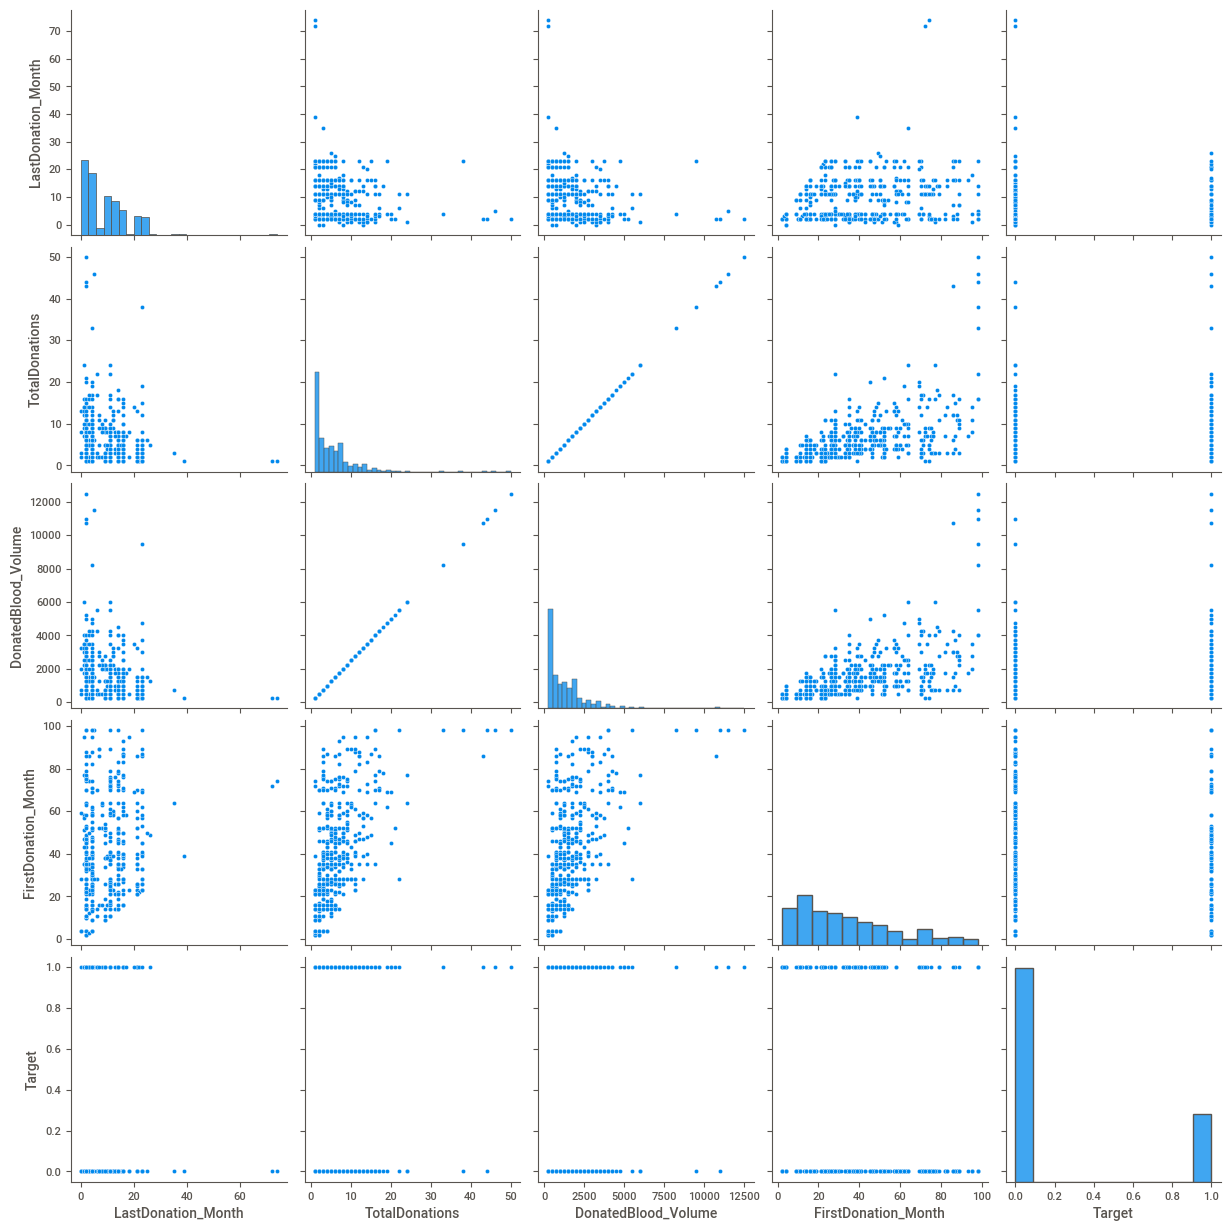

In [33]:
sns.pairplot(data=data.drop(columns='ID'))
plt.show()

<Axes: xlabel='Target', ylabel='count'>

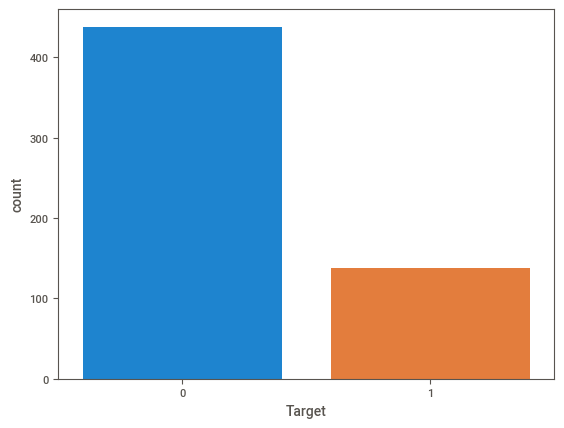

In [34]:
sns.countplot(x=data.Target)

In [35]:
#Information from EDA
#Highly imbalanced data
#positive is 24% and negative is 76%
#TotalDonation and DonatedBlood_Volume has high correlation

In [36]:
data.corr()

,ID,LastDonation_Month,TotalDonations,DonatedBlood_Volume,FirstDonation_Month,Target
ID,1.000000,-0.023217,0.063148,0.063148,0.098370,0.041925
LastDonation_Month,-0.023217,1.000000,-0.159731,-0.159731,0.186899,-0.261234
TotalDonations,0.063148,-0.159731,1.000000,1.000000,0.622116,0.220615
DonatedBlood_Volume,0.063148,-0.159731,1.000000,1.000000,0.622116,0.220615
FirstDonation_Month,0.098370,0.186899,0.622116,0.622116,1.000000,-0.019819
Target,0.041925,-0.261234,0.220615,0.220615,-0.019819,1.000000


<Axes: >

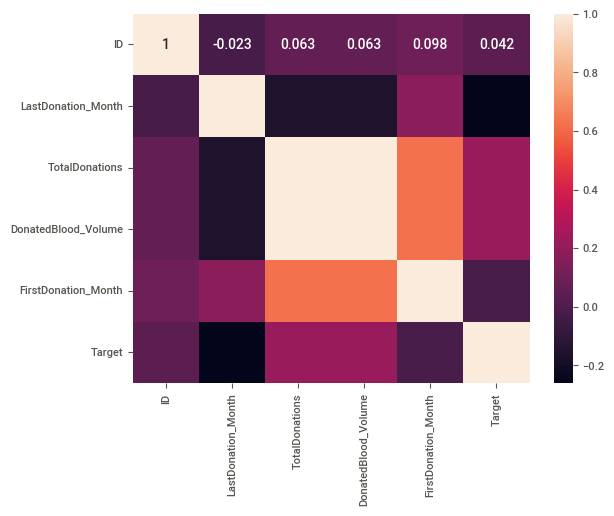

In [37]:
sns.heatmap(data.corr(),annot=True)

In [38]:
#since TotalDonations and DonatedBlood_Volume are highly correlated . we can remove one of them
#ID columns has lesser correlation ,hence we can also remove that

In [39]:
data.drop(columns=['ID','TotalDonations'],axis=1,inplace=True)

In [40]:
data

,LastDonation_Month,DonatedBlood_Volume,FirstDonation_Month,Target
0,2,12500,98,1
1,0,3250,28,1
2,1,4000,35,1
3,2,5000,45,1
4,1,6000,77,0
...,...,...,...,...
571,23,250,23,0
572,16,750,86,0
573,21,500,52,0
574,39,250,39,0


In [41]:
#since the values are within the range of thousands .we don't need scalling process

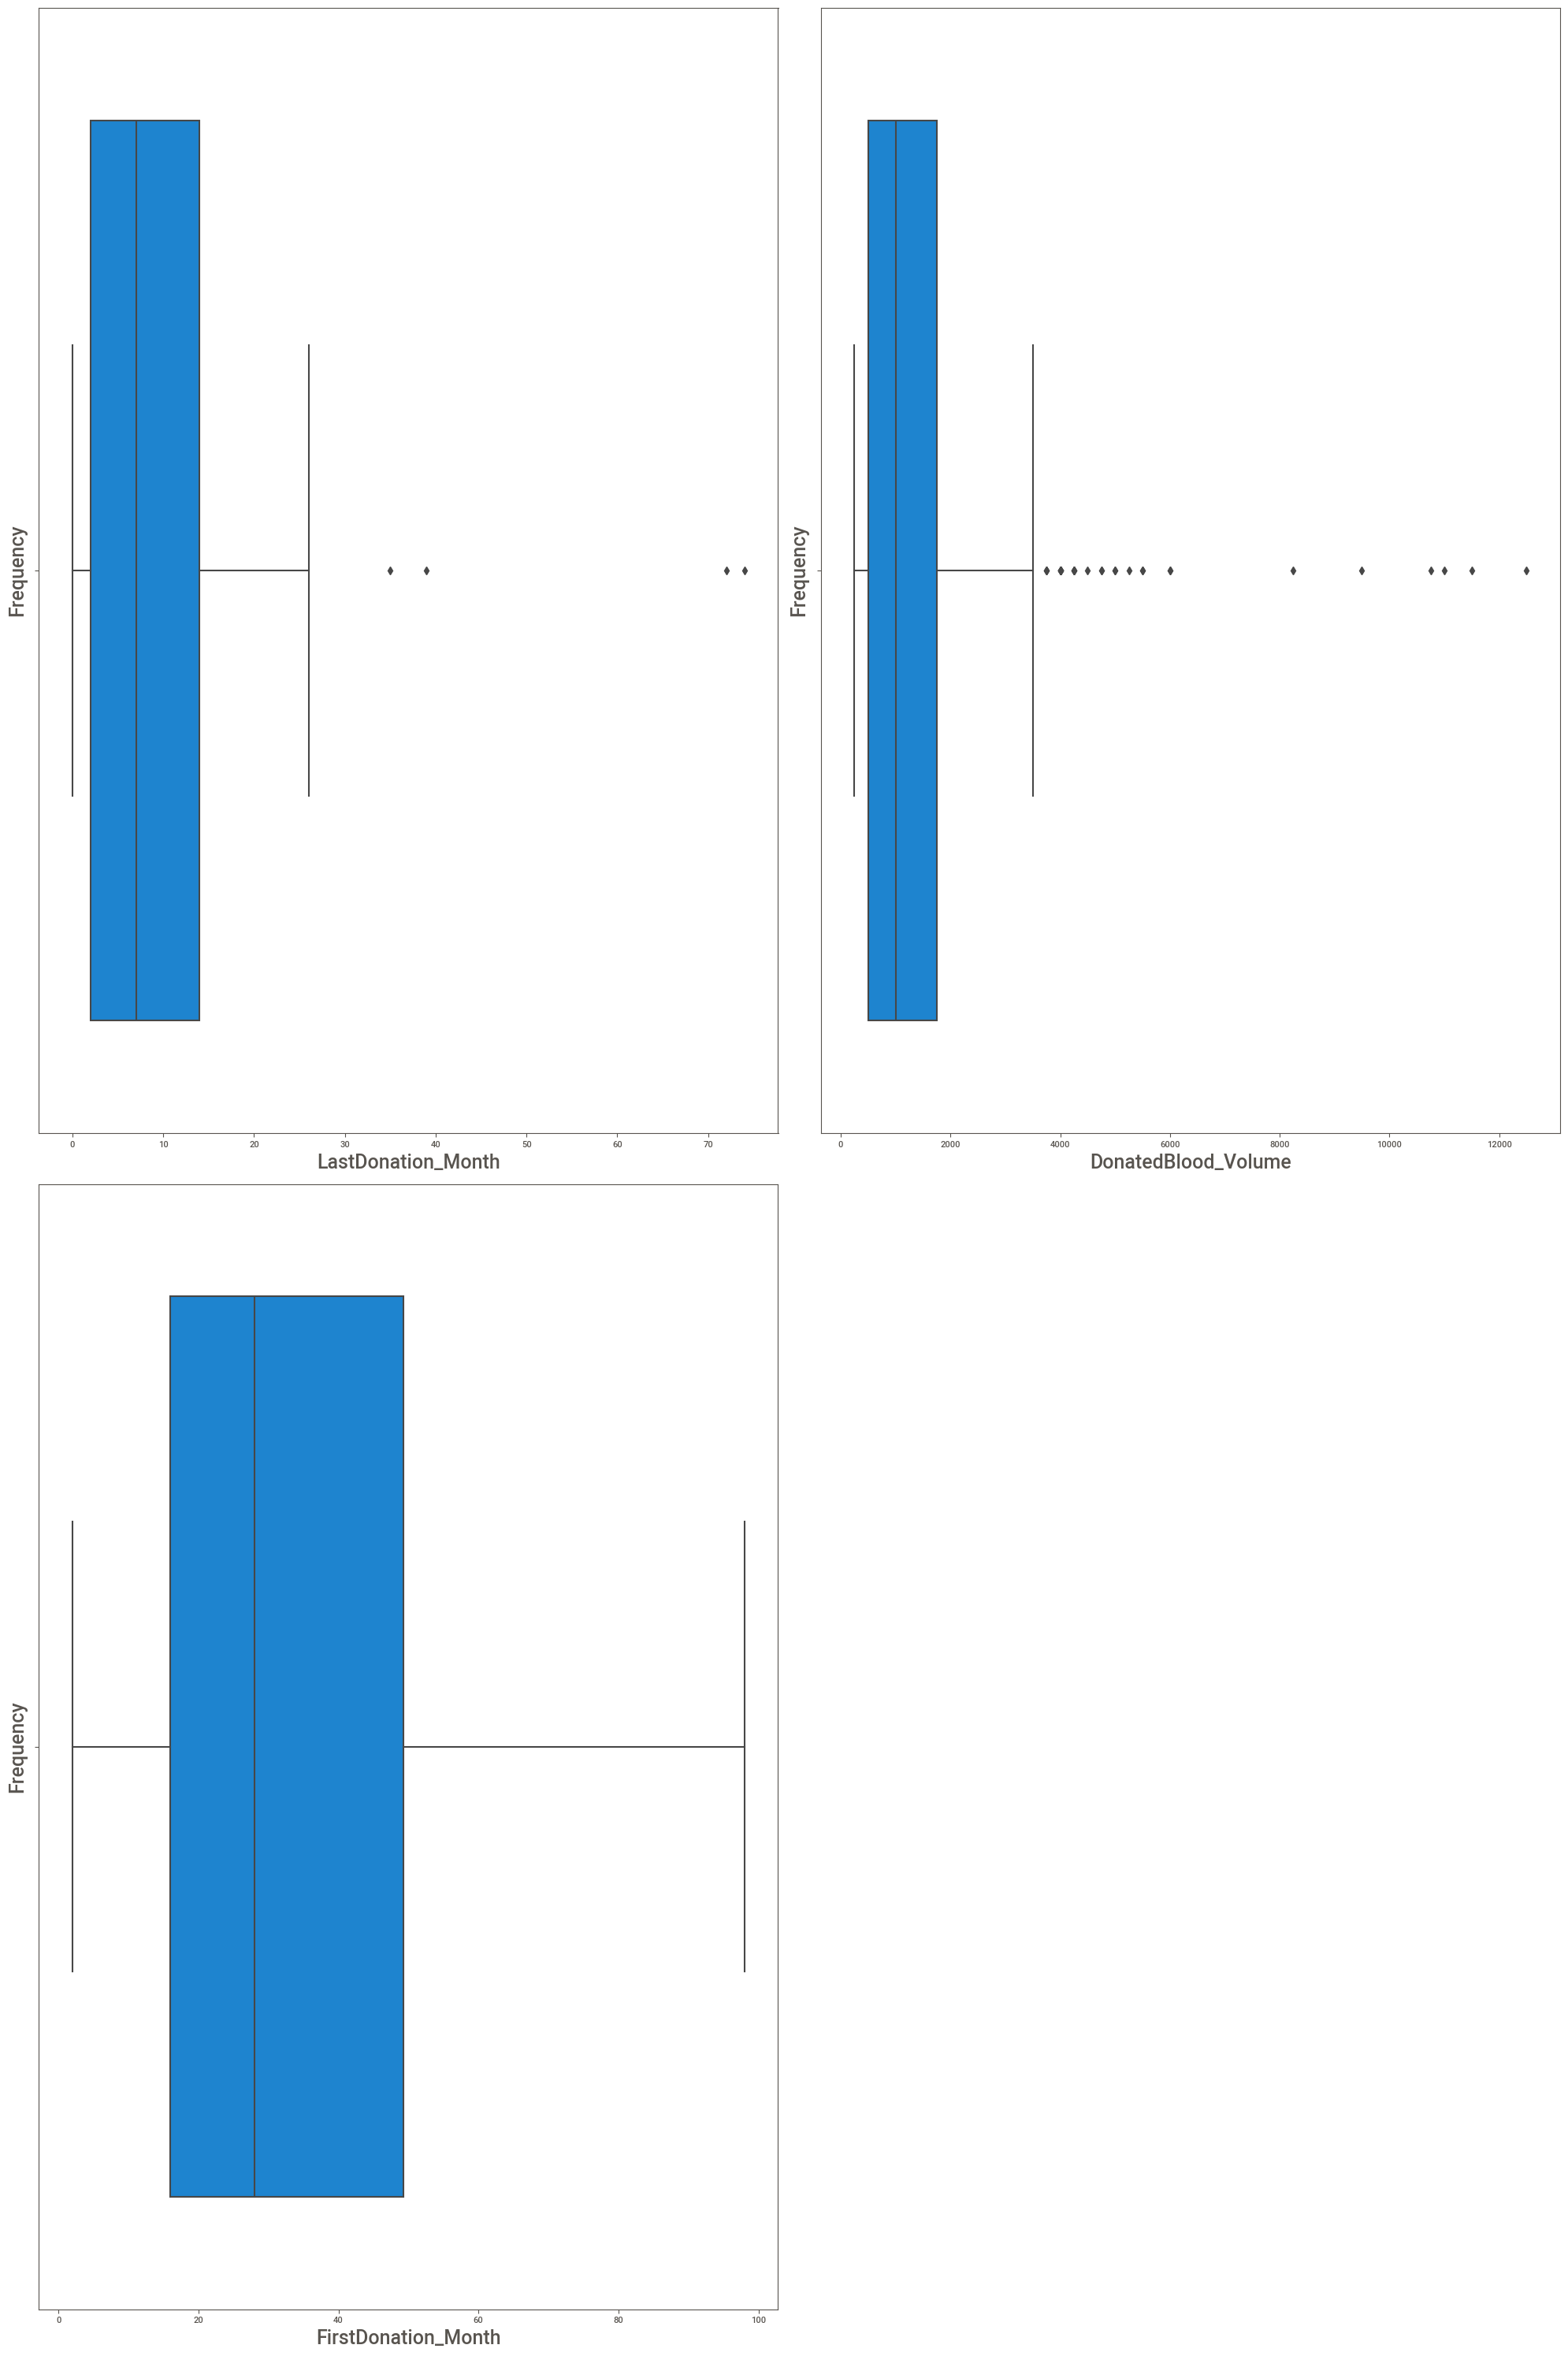

In [42]:
plt.figure(figsize =(20,30),facecolor = 'white')
plotnumber = 1
for i in data:
    if i != 'Target':
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(x=i,data=data)
        plt.xlabel(i,fontsize=18)
        plt.ylabel('Frequency',fontsize=18)
    plotnumber+=1
plt.tight_layout()

In [43]:
#There are outliers in LastDonation_Month and DonatedBlood_Volume since it is in months there is no need to remove outliers


In [44]:
data.columns

Index(['LastDonation_Month', 'DonatedBlood_Volume', 'FirstDonation_Month',
       'Target'],
      dtype='object')

In [45]:
X=data.loc[:,['LastDonation_Month', 'DonatedBlood_Volume', 'FirstDonation_Month']]
y=data.Target

In [48]:
X

,LastDonation_Month,DonatedBlood_Volume,FirstDonation_Month
0,2,12500,98
1,0,3250,28
2,1,4000,35
3,2,5000,45
4,1,6000,77
...,...,...,...
571,23,250,23
572,16,750,86
573,21,500,52
574,39,250,39


In [49]:
y

0      1
1      1
2      1
3      1
4      0
      ..
571    0
572    0
573    0
574    0
575    0
Name: Target, Length: 576, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=3)

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [52]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [53]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob

array([[3.00565327e-01, 6.99434673e-01],
       [6.63819023e-01, 3.36180977e-01],
       [8.62165040e-01, 1.37834960e-01],
       [8.63459307e-01, 1.36540693e-01],
       [9.24490185e-01, 7.55098146e-02],
       [9.42744343e-01, 5.72556568e-02],
       [5.99618769e-01, 4.00381231e-01],
       [8.65777602e-01, 1.34222398e-01],
       [6.63819023e-01, 3.36180977e-01],
       [8.19795598e-01, 1.80204402e-01],
       [6.19700948e-01, 3.80299052e-01],
       [4.90195646e-01, 5.09804354e-01],
       [8.73278908e-01, 1.26721092e-01],
       [6.46469006e-01, 3.53530994e-01],
       [7.95642274e-01, 2.04357726e-01],
       [7.96810275e-01, 2.03189725e-01],
       [8.85509767e-01, 1.14490233e-01],
       [9.29326187e-01, 7.06738132e-02],
       [6.83946517e-01, 3.16053483e-01],
       [6.14470984e-01, 3.85529016e-01],
       [6.17089355e-01, 3.82910645e-01],
       [6.17089355e-01, 3.82910645e-01],
       [7.40773965e-01, 2.59226035e-01],
       [8.88436980e-01, 1.11563020e-01],
       [4.650340

In [54]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_pred)
acc

0.8055555555555556

In [55]:
a = pd.crosstab(y_test,y_pred)
a

col_0,0,1
Target,,
0,112,1
1,27,4


In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       113
           1       0.80      0.13      0.22        31

    accuracy                           0.81       144
   macro avg       0.80      0.56      0.56       144
weighted avg       0.80      0.81      0.75       144



In [57]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=17)

In [58]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [59]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 325, 1: 107})
SMOTE Classes Counter({1: 325, 0: 325})


In [60]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_smote,y_smote)

LogisticRegression()

In [61]:
y_hat=model.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.6111111111111112

In [63]:
a = pd.crosstab(y_test,y_hat)
a

col_0,0,1
Target,,
0,62,51
1,5,26


In [64]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.93      0.55      0.69       113
           1       0.34      0.84      0.48        31

    accuracy                           0.61       144
   macro avg       0.63      0.69      0.59       144
weighted avg       0.80      0.61      0.64       144



In [65]:
#accuracy score decreased after balancing the data

In [66]:
from sklearn.svm import SVC
svclassifier = SVC() 
svclassifier.fit(X_train, y_train)

SVC()

In [67]:
y_pred=svclassifier.predict(X_test)

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       113
           1       0.00      0.00      0.00        31

    accuracy                           0.78       144
   macro avg       0.39      0.50      0.44       144
weighted avg       0.62      0.78      0.69       144



In [69]:
a = pd.crosstab(y_test,y_pred)
a

col_0,0
Target,
0,113
1,31


In [70]:
from sklearn.svm import SVC
svclassifier = SVC() 
svclassifier.fit(X_smote, y_smote)

SVC()

In [71]:
y_hat=svclassifier.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.6527777777777778

In [73]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.89      0.64      0.74       113
           1       0.35      0.71      0.47        31

    accuracy                           0.65       144
   macro avg       0.62      0.67      0.61       144
weighted avg       0.77      0.65      0.68       144

